In [1]:
# import libraries

import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create X & y values

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [5]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
# Create Train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
len(X), len(X_train), len(X_test)


(1338, 1070, 268)

In [8]:
# Build Model

# create model
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

# compule model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# fit model
insurance_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8425.7324 - mae: 8425.7324
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7405.6958 - mae: 7405.6958
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7583.3042 - mae: 7583.3042
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7536.6333 - mae: 7536.6333
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7451.2632 - mae: 7451.2632
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7541.6230 - mae: 7541.6230
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7674.9297 - mae: 7674.9297
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7437.6934 - mae: 7437.6934
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7527.3667 - mae: 7527.3667
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7497.6553 - mae: 7497.6553

In [9]:
# Evaluate Model
insurance_model.evaluate(X_test, y_test) 

9/9 [==============================] - 0s 1ms/step - loss: 7543.1680 - mae: 7543.1680


[7543.16796875, 7543.16796875]

In [10]:
y_train.median(), y_train.mean()

(9208.12055, 13064.89636283177)

In [11]:
# improve the model
# just adding new layer didn't work as it was bigger for this data. Change the Optimizer as well

In [12]:
# create model
insurance_model_2 = tf.keras.Sequential()
insurance_model_2.add(tf.keras.layers.Dense(100))
insurance_model_2.add(tf.keras.layers.Dense(10))
insurance_model_2.add(tf.keras.layers.Dense(1))

# compule model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# fit model
insurance_model_2.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13013.9219 - mae: 13013.9219
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12857.7852 - mae: 12857.7852
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12526.3262 - mae: 12526.3262
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 11882.7500 - mae: 11882.7500
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10800.9658 - mae: 10800.9658
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9394.6016 - mae: 9394.6016
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8115.7935 - mae: 8115.7935
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7490.6196 - mae: 7490.6196
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7342.4614 - mae: 7342.4614
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7310.7998 - mae:

In [13]:
# Evaluate Model 2
insurance_model_2.evaluate(X_test, y_test) 

9/9 [==============================] - 0s 2ms/step - loss: 5644.1592 - mae: 5644.1592


[5644.1591796875, 5644.1591796875]

In [14]:
# create model
insurance_model_3 = tf.keras.Sequential()
insurance_model_3.add(tf.keras.layers.Dense(100))
insurance_model_3.add(tf.keras.layers.Dense(10))
insurance_model_3.add(tf.keras.layers.Dense(1))

# compule model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# fit model
history = insurance_model_3.fit(X_train, y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13051.2510 - mae: 13051.2510
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12969.0957 - mae: 12969.0957
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12768.4365 - mae: 12768.4365
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12315.3525 - mae: 12315.3525
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11445.7432 - mae: 11445.7432
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 10103.4268 - mae: 10103.4268
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8667.6562 - mae: 8667.6562
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7662.7588 - mae: 7662.7588
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7373.6416 - mae: 7373.6416
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7337.2749 - ma

In [15]:
# Evaluate Model 3
insurance_model_3.evaluate(X_test, y_test) 

9/9 [==============================] - 0s 1ms/step - loss: 3801.2917 - mae: 3801.2917


[3801.291748046875, 3801.291748046875]

Text(0.5, 0, 'epochs')

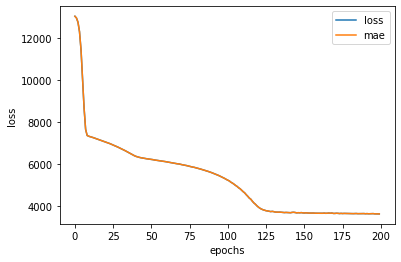

In [16]:
# plot history (loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')


In [17]:
# Prepare Data (Normalization and Standardization)

# On Scaling values Neural Networks prefer Normalization

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [23]:
# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]


In [24]:
# Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [25]:
# Define Column Transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),      #turn these column values to 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)


In [26]:
# Fit column transformer to our training data
ct.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [27]:
# Transform Train and Test data with Normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [28]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [29]:
X_test.shape, X_test_normal.shape

((268, 6), (268, 11))

In [31]:
# Build Neural Network Model 
tf.random.set_seed(100)

# Create Model
insurance_model_4 = tf.keras.Sequential()
insurance_model_4.add(tf.keras.layers.Dense(100))
insurance_model_4.add(tf.keras.layers.Dense(10))
insurance_model_4.add(tf.keras.layers.Dense(1))


In [32]:
# compile model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])


In [34]:
# fit model
history_4 = insurance_model_4.fit(X_train_normal, y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 4637.5386 - mae: 4637.5386
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 4694.1963 - mae: 4694.1963
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 5161.0200 - mae: 5161.0200
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 4895.8618 - mae: 4895.8618
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 4914.8696 - mae: 4914.8696
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 4641.8223 - mae: 4641.8223
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 4404.0132 - mae: 4404.0132
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 5070.0913 - mae: 5070.0913
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 4863.2700 - mae: 4863.2700
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 4889.4854 - mae: 4889.4854

In [35]:
# Evaluate Model
insurance_model_4.evaluate(X_test_normal, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 4062.3826 - mae: 4062.3826


[4062.382568359375, 4062.382568359375]

Text(0.5, 0, 'epochs')

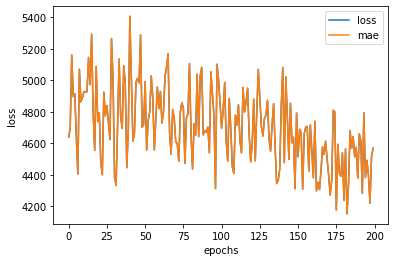

In [36]:
# plot history (loss curve or training curve)
pd.DataFrame(history_4.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
